In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Recursos humanos.csv')
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [3]:
# Convertir las columnas categóricas a binarias con dummies
df = pd.concat([df, pd.get_dummies(df['salary'], prefix='salary')], axis=1)
# Eliminando las colunmas de origen 
df = df.drop('salary', axis=1)
df = df.drop('sales', axis=1)

In [4]:
#Convertiendo a tipo enteros las variables salary
df['salary_high'] = df['salary_high'].astype(int)
df['salary_low'] = df['salary_low'].astype(int)
df['salary_medium'] = df['salary_medium'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary_high            14999 non-null  int64  
 9   salary_low             14999 non-null  int64  
 10  salary_medium          14999 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.3 MB


In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,0


In [6]:
# Separacion de x & y
y = df.left.values
x_df = df.drop(['left'], axis = 1)
x = np.asarray(x_df)

In [7]:
# Bases de entrenamiento y de Prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)
print("Grupo de entrenamiento", x_train.shape, y_train.shape)
print("Grupo de prueba", x_test.shape, y_test.shape)

Grupo de entrenamiento (11249, 10) (11249,)
Grupo de prueba (3750, 10) (3750,)


# SVM con kernel Lineal

In [9]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[2689,  173],
       [ 659,  229]])

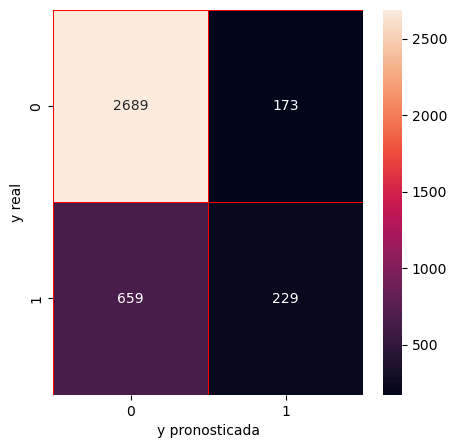

In [10]:
# Visualizal confusion matrix
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.ylabel('y real')
plt.xlabel('y pronosticada')
plt.show()

In [11]:
# classification metrics
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2862
           1       0.57      0.26      0.36       888

    accuracy                           0.78      3750
   macro avg       0.69      0.60      0.61      3750
weighted avg       0.75      0.78      0.75      3750



# SVM con Kernel Polinomial

In [13]:
clf = svm.SVC(kernel = 'poly')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[2862,    0],
       [ 888,    0]])

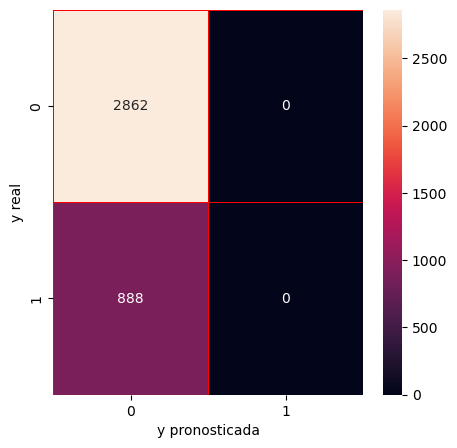

In [14]:
# Visualizal confusion matrix
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.ylabel('y real')
plt.xlabel('y pronosticada')
plt.show()

In [15]:
# classification metrics
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2862
           1       0.00      0.00      0.00       888

    accuracy                           0.76      3750
   macro avg       0.38      0.50      0.43      3750
weighted avg       0.58      0.76      0.66      3750



# SVM con Kernel Radial Basis function (RBF)

In [17]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[2862,    0],
       [ 819,   69]])

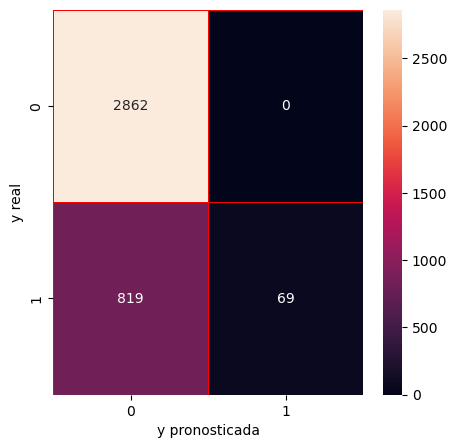

In [18]:
# Visualizal confusion matrix
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.ylabel('y real')
plt.xlabel('y pronosticada')
plt.show()

In [19]:
# classification metrics
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2862
           1       1.00      0.08      0.14       888

    accuracy                           0.78      3750
   macro avg       0.89      0.54      0.51      3750
weighted avg       0.83      0.78      0.70      3750



# SVM con Kernel Sigmoide

In [21]:
clf = svm.SVC(kernel = 'sigmoid')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[2324,  538],
       [ 579,  309]])

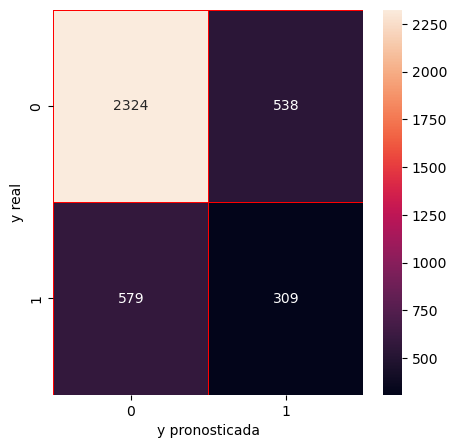

In [22]:
# Visualizal confusion matrix
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt = '.0f', ax = ax)
plt.ylabel('y real')
plt.xlabel('y pronosticada')
plt.show()

In [23]:
# classification metrics
cnf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2862
           1       0.36      0.35      0.36       888

    accuracy                           0.70      3750
   macro avg       0.58      0.58      0.58      3750
weighted avg       0.70      0.70      0.70      3750



# Pronostico para el nuevo empleado

In [25]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
m = [[0.5, 0.75, 4, 200, 4, 0, 0, 0, 0, 1]]
x_new = np.asarray(m)
x_new

array([[  0.5 ,   0.75,   4.  , 200.  ,   4.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   1.  ]])

In [33]:
ypred = clf.predict(x_new)
ypred

array([0])